<a href="https://colab.research.google.com/github/venuJangili/trail/blob/master/yoga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pexels-cliff-booth-4056723.jpg to pexels-cliff-booth-4056723.jpg


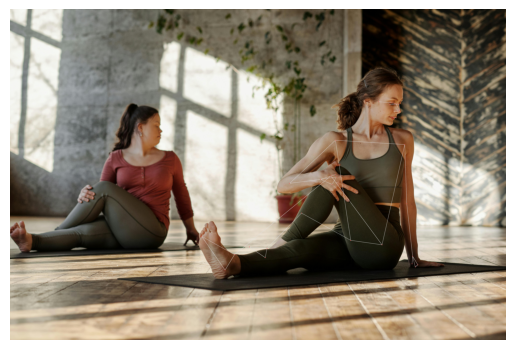

Your pose looks good!


In [14]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
# Upload an image
uploaded = files.upload()

# Define pose detection function
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def detect_pose(image):
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        # Convert the BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        # Draw the pose annotation on the image
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        return image, results.pose_landmarks

def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def provide_feedback(landmarks):
    if landmarks:
        # Example: Check the angle between shoulder, elbow, and wrist
        shoulder = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                 landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                 landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        angle = calculate_angle(shoulder, elbow, wrist)
        if angle < 160:
            print("Adjust your elbow position for better alignment.")
        else:
            print("Your pose looks good!")
    else:
        print("Pose landmarks not detected.")

# Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the filename of the uploaded image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image.")
else:
    # Detect pose
    annotated_image, landmarks = detect_pose(image)

    # Display the result
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Provide feedback
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def provide_feedback(landmarks):
    if landmarks:
        # Example: Check the angle between shoulder, elbow, and wrist
        shoulder = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                 landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                 landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        angle = calculate_angle(shoulder, elbow, wrist)
        if angle < 160:
            print("Adjust your elbow position for better alignment.")
        else:
            print("Your pose looks good!")
    else:
        print("Pose landmarks not detected.")

# Provide feedback
provide_feedback(landmarks)

